In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [11]:
data=pd.read_csv('temp.csv')

In [12]:
df=pd.DataFrame(data)

In [13]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [14]:
df.shape

(7752, 25)

The dataset has 7752 rows and 25 columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


we can see the datatypes and the null values in the dataset

# Encoding the object column

In [17]:

le=LabelEncoder()
df['Date']=le.fit_transform(df['Date'])

In [18]:
df.dtypes

station             float64
Date                  int32
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Treating NUll values

In [20]:
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [22]:
df['station'] = df['station'].fillna(df['station'].mean())

In [24]:
df['Present_Tmax'] = df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin'] = df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin'] = df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax'] = df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

In [26]:
df['LDAPS_Tmax_lapse'] = df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse'] = df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS'] = df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH'] = df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

df['LDAPS_CC1'] = df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2'] = df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3'] = df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4'] = df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

In [28]:
df['LDAPS_PPT1'] = df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2'] = df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3'] = df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4'] = df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

df['LDAPS_PPT1'] = df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2'] = df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3'] = df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4'] = df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

In [29]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Null values are removed 

# Checking Outliers

station                AxesSubplot(0.125,0.749828;0.110714x0.130172)
Date                AxesSubplot(0.257857,0.749828;0.110714x0.130172)
Present_Tmax        AxesSubplot(0.390714,0.749828;0.110714x0.130172)
Present_Tmin        AxesSubplot(0.523571,0.749828;0.110714x0.130172)
LDAPS_RHmin         AxesSubplot(0.656429,0.749828;0.110714x0.130172)
LDAPS_RHmax         AxesSubplot(0.789286,0.749828;0.110714x0.130172)
LDAPS_Tmax_lapse       AxesSubplot(0.125,0.593621;0.110714x0.130172)
LDAPS_Tmin_lapse    AxesSubplot(0.257857,0.593621;0.110714x0.130172)
LDAPS_WS            AxesSubplot(0.390714,0.593621;0.110714x0.130172)
LDAPS_LH            AxesSubplot(0.523571,0.593621;0.110714x0.130172)
LDAPS_CC1           AxesSubplot(0.656429,0.593621;0.110714x0.130172)
LDAPS_CC2           AxesSubplot(0.789286,0.593621;0.110714x0.130172)
LDAPS_CC3              AxesSubplot(0.125,0.437414;0.110714x0.130172)
LDAPS_CC4           AxesSubplot(0.257857,0.437414;0.110714x0.130172)
LDAPS_PPT1          AxesSubplot(0.

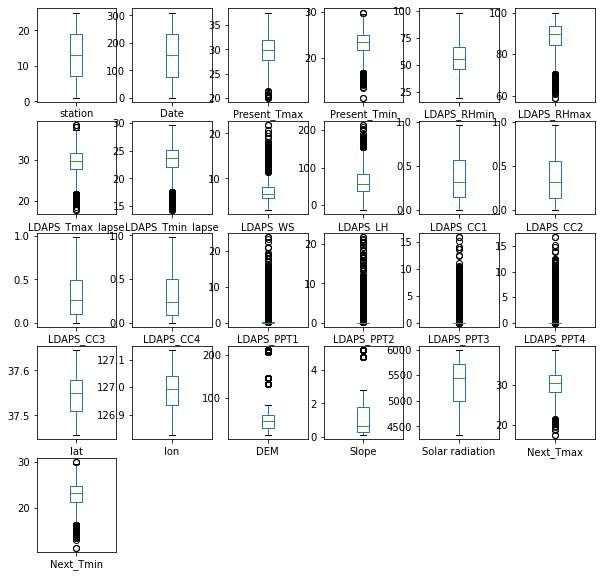

In [30]:

df.plot(kind='box',subplots=True,layout=(5,6),figsize=(10,10))

There are outliers in the dataset

# Checking Skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

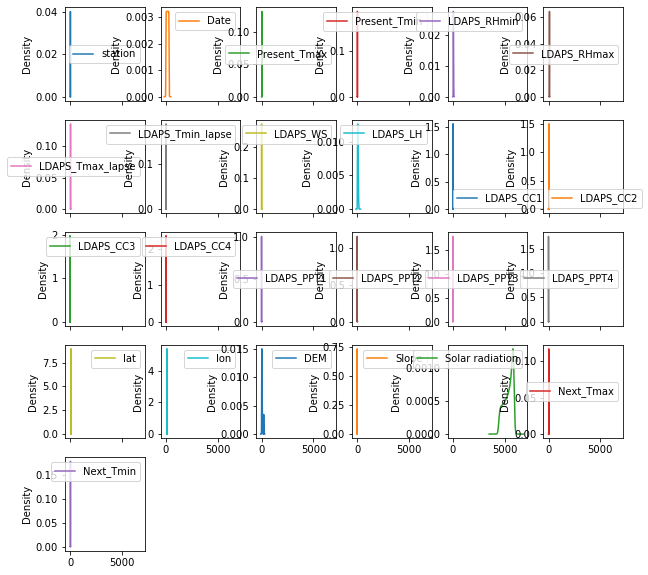

In [31]:
df.plot(kind='kde',subplots=True,layout=(5,6),figsize=(10,10)) 

In [35]:
df.skew()

station             0.000000
Date                0.000008
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

There is skewness in most of the columns

# Dropping the columns station','Date'

In [36]:
df.drop(['station','Date'],axis=1,inplace=True)

# Checking correlation

In [43]:
df.corr()


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610867,0.623271
Present_Tmin,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.472134,0.797224
LDAPS_RHmin,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.439064,0.095272
LDAPS_RHmax,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283960,-0.072053
LDAPS_Tmax_lapse,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.828811,0.588019
LDAPS_Tmin_lapse,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.588004,0.881708
LDAPS_WS,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.343551,-0.096807
LDAPS_LH,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157941,-0.055554
LDAPS_CC1,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,...,0.389453,0.168742,0.091722,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.453563,-0.011053
LDAPS_CC2,-0.213791,0.090263,0.745443,0.391330,-0.523619,0.047727,0.261090,-0.264280,0.779683,1.000000,...,0.478472,0.240134,0.159548,-0.001497,-0.003581,-0.012823,-0.018073,0.170403,-0.491892,0.031323


<AxesSubplot:>

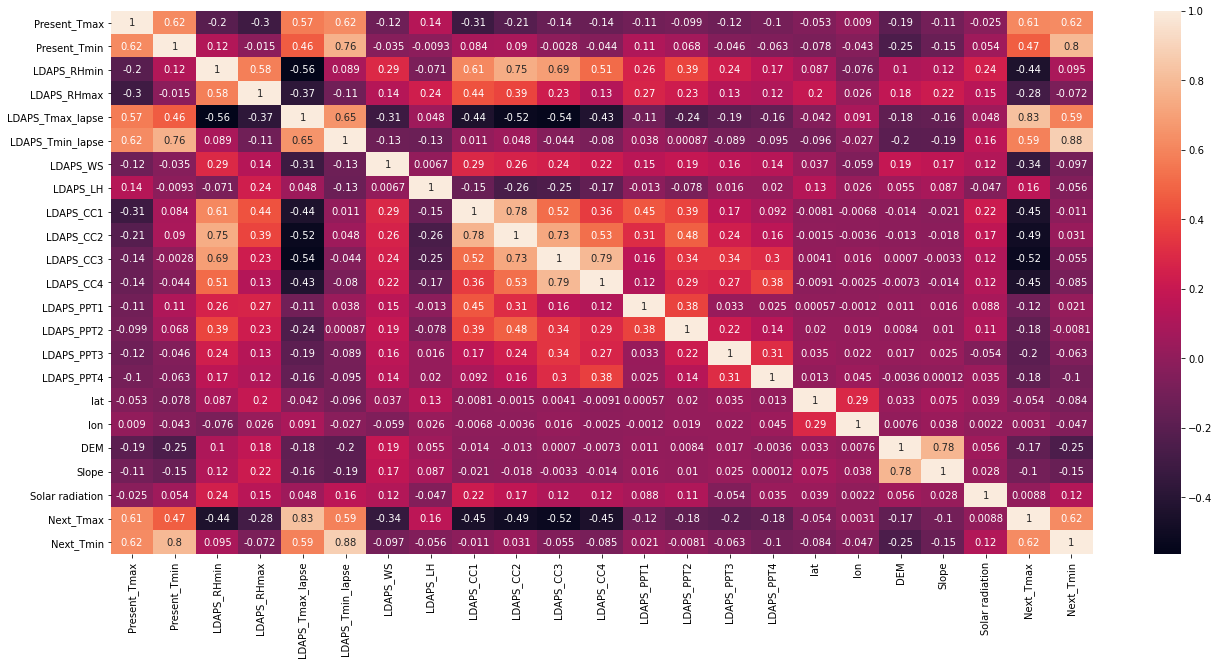

In [45]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True)

Lighter shades are correlated

<function matplotlib.pyplot.show(close=None, block=None)>

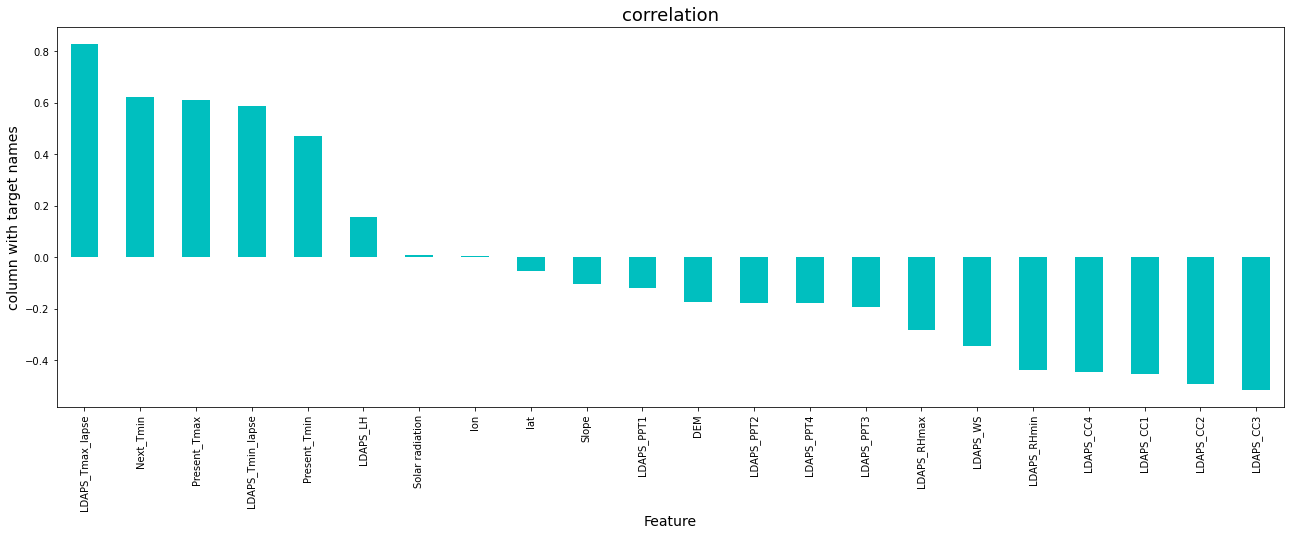

In [47]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


From the graph we can see the columns those are positively and negatively correlated to the target variable

<function matplotlib.pyplot.show(close=None, block=None)>

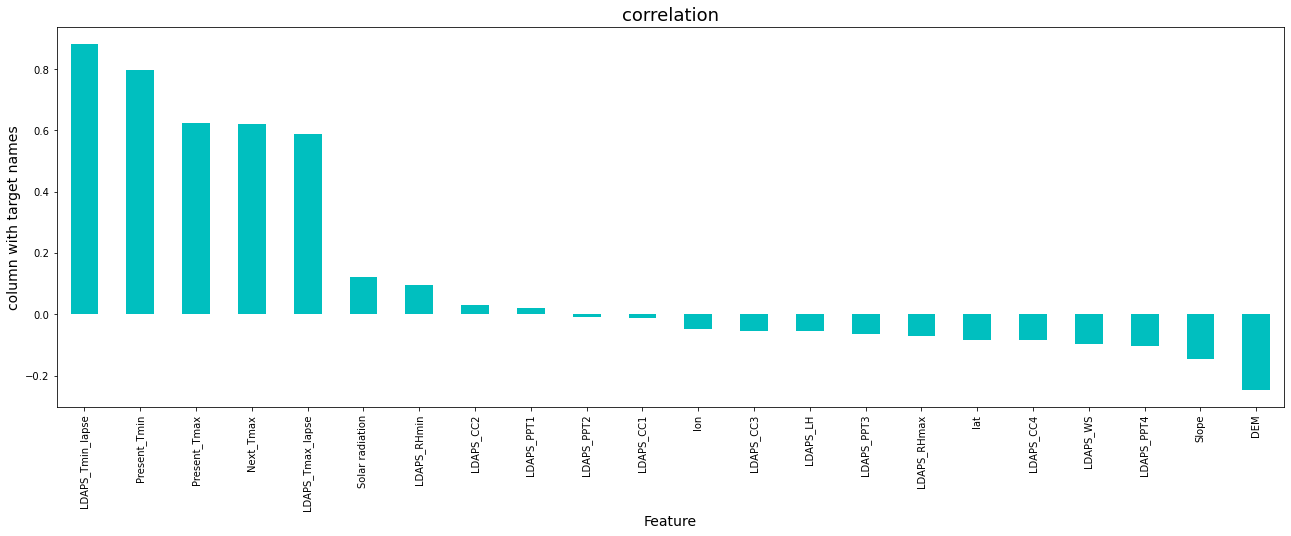

In [48]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


In [49]:


df.drop(['LDAPS_Tmax_lapse'],axis=1,inplace=True)

Dropping LDAPS_Tmax_lapse'

# Splitting input and target variables

In [51]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df['Next_Tmax']

# Removing Skewness using piwer transform method

In [52]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\GR20258288\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\GR20258288\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\GR20258288\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\GR20258288\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


# Scaling the input variable

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Model selection

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').